In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [15]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = 'data'
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1658 files belonging to 4 classes.


In [16]:
data_iterator=data.as_numpy_iterator()

In [17]:
batch=data_iterator.next()

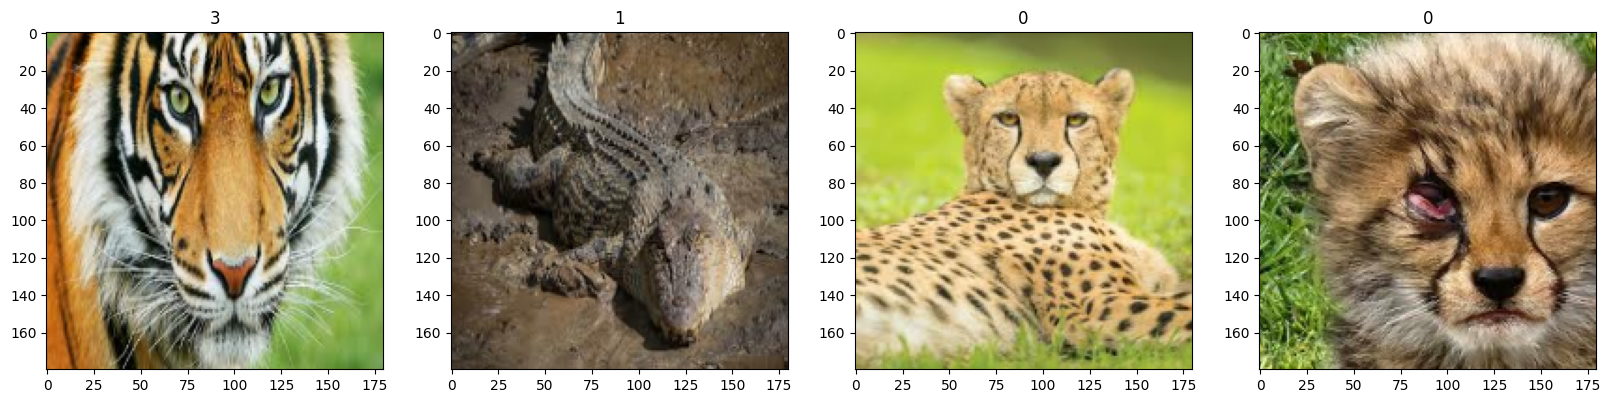

In [18]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
data=data.map(lambda x,y:(x/255,y))

In [25]:
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = int(0.1 * len(data))

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)


In [58]:
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4)
    ])

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [60]:
model.fit(train, validation_data=val, epochs=15)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 0.2717 - loss: 1.8979 - val_accuracy: 0.4313 - val_loss: 1.2836
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - accuracy: 0.4350 - loss: 1.2550 - val_accuracy: 0.5312 - val_loss: 1.1050
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 461ms/step - accuracy: 0.5684 - loss: 1.0157 - val_accuracy: 0.7000 - val_loss: 0.8549
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 456ms/step - accuracy: 0.7069 - loss: 0.7376 - val_accuracy: 0.7437 - val_loss: 0.7797
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 463ms/step - accuracy: 0.8179 - loss: 0.5207 - val_accuracy: 0.7437 - val_loss: 0.6619
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.8829 - loss: 0.3533 - val_accuracy: 0.7375 - val_loss: 0.7949
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.9051 - loss: 0.3221 - val_accuracy: 0.8188 - val_loss: 0.4402
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step - accuracy: 0.9578 - loss: 0.1538 - val_accu

In [61]:
loss,accuracy=model.evaluate(test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8705 - loss: 0.6876


In [62]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.887499988079071
